<a href="https://colab.research.google.com/github/Cyrill98/Python-Image-Processing/blob/main/HumanVSHorse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN with Complex Images**

In this colab, we will distinguish between the image of human and horse. We'll be using TensorFlow in this lab to create a CNN that is trained to recognize images of horses and humans, and classify them

Load Data

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

--2021-07-17 21:42:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 64.233.170.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   126MB/s    in 1.1s    

2021-07-17 21:42:19 (126 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile
 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

The contents of the zip file are extracted to the base directory /tmp/horse-or-human, which contain horses and human subdirectories.

In short, the training set is the data that is used to tell the neural network model that "this is what a horse looks like" and "this is what a human looks like."

# **ImageGenerator to prepare data**

---



Later you'll see something called an ImageDataGenerator being used. It reads images from subdirectories and automatically labels them from the name of that subdirectory. For example, you have a training directory containing a horses directory and a humans directory. ImageDataGenerator will label the images appropriately for you, reducing a coding step.

In [3]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
 
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

Now, see what the filenames look like in the horses and humans training directories:

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse11-5.png', 'horse07-1.png', 'horse41-5.png', 'horse31-8.png', 'horse47-7.png', 'horse15-9.png', 'horse24-2.png', 'horse34-0.png', 'horse11-9.png', 'horse24-6.png']
['human12-02.png', 'human15-26.png', 'human05-29.png', 'human17-04.png', 'human14-00.png', 'human17-29.png', 'human12-06.png', 'human05-26.png', 'human04-15.png', 'human12-26.png']


Find the total number of horse and human images in the directories

In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


# **Data Exploration**
Take a look at a few pictures to get a better sense of what they look like.

In [6]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0

display a batch of eight horse pictures and eight human pictures. You can rerun the cell to see a fresh batch each time.

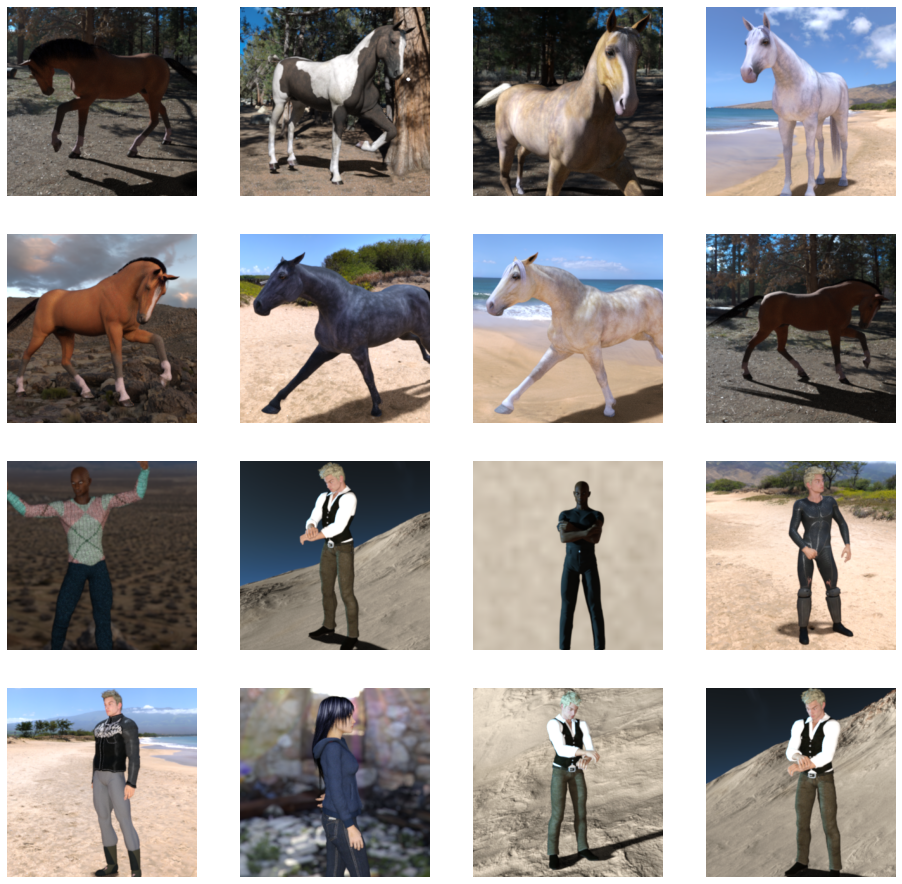

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()

# **Define Model**

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

The output shape column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding and each pooling layer halves the dimensions.

# **Compile Model**

Next, configure the specifications for model training. Train your model with the binary_crossentropy loss because it's a binary classification problem and your final activation is a sigmoid. Use the rmsprop optimizer with a learning rate of 0.001. During training, monitor classification accuracy.

Note: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD) because RMSprop automates learning-rate tuning for you. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training and would work equally well here.)

In [13]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

# **Train Model from Generators**

Set up data generators that read pictures in your source folders, convert them to float32 tensors, and feed them (with their labels) to your network.

---



You'll have one generator for the training images and one for the validation images. Your generators will yield batches of images of size 300x300 and their labels (binary).

---



As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It's uncommon to feed raw pixels into a CNN.) In your case, you'll preprocess your images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

---



In Keras, that can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. That ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). Those generators can then be used with the Keras model methods that accept data generators as inputs: fit_generator, evaluate_generator and predict_generator.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 86s 10s/step - loss: 0.7529 - acc: 0.5362
Epoch 2/15
8/8 [==============================] - 80s 10s/step - loss: 0.6900 - acc: 0.5962
Epoch 3/15
8/8 [==============================] - 81s 10s/step - loss: 0.9543 - acc: 0.7052
Epoch 4/15
8/8 [==============================] - 80s 10s/step - loss: 0.4304 - acc: 0.8087
Epoch 5/15
8/8 [==============================] - 91s 11s/step - loss: 0.2774 - acc: 0.8818
Epoch 6/15
8/8 [==============================] - 81s 10s/step - loss: 0.7112 - acc: 0.8710
Epoch 7/15
8/8 [==============================] - 80s 10s/step - loss: 0.2747 - acc: 0.8943
Epoch 8/15
8/8 [==============================] - 84s 10s/step - loss: 0.4765 - acc: 0.8465
Epoch 9/15
8/8 [==============================] - 82s 10s/step - loss: 0.0945 - acc: 0.9633
Epoch 10/15
8/8 [==============================] - 91s 11s/step - loss: 0.0839 - acc: 0.9648
Epoch 11/15
8/8 [==============================] - 82s 10s/step - loss: 0.0375 

# **Test the Model**
Now actually run a prediction using the model. The code will allow you to choose one or more files from your file system. It will then upload them and run them through the model, giving an indication of whether the object is a horse or a human.

---



You can download images from the internet to your file system to try them out! Note that you might see that the network makes a lot of mistakes despite the fact that the training accuracy is above 99%.

---



That's due to something called overfitting, which means that the neural network is trained with very limited data (there are only roughly 500 images of each class). So it's very good at recognizing images that look like those in the training set, but it can fail a lot at images that are not in the training set.

---



That's a datapoint proving that the more data that you train on, the better your final network will be!

---



There are many techniques that can be used to make your training better, despite limited data, including something called image augmentation, but that's beyond the scope of this codelab.

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving elon.png to elon.png
[1.]
elon.png is a human


# **Visualize Intermediate Responses**

To get a feel for what kind of features your CNN has learned, a fun thing to do is visualize how an input gets transformed as it goes through the CNN.

Pick a random image from the training set, then generate a figure where each row is the output of a layer and each image in the row is a specific filter in that output feature map. Rerun that cell to generate intermediate representations for a variety of training images.

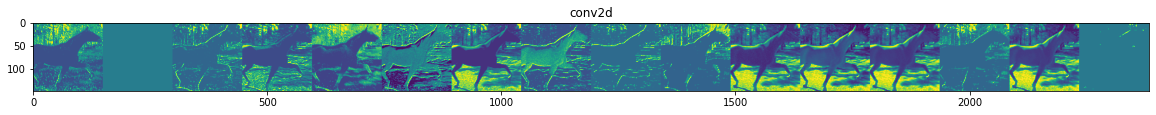

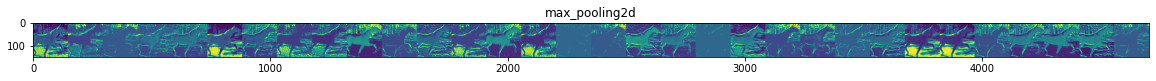

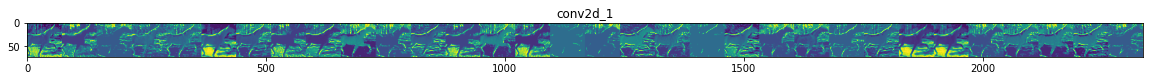

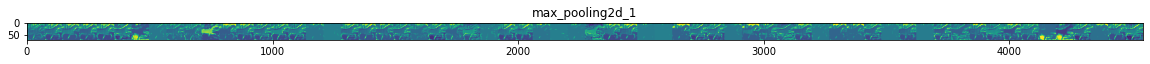

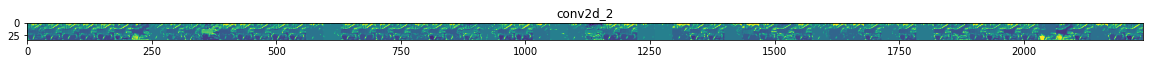

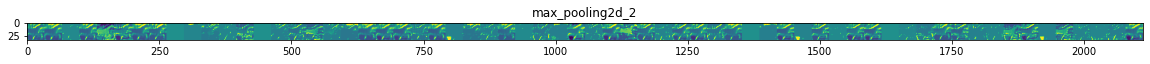

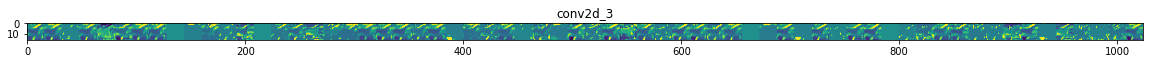

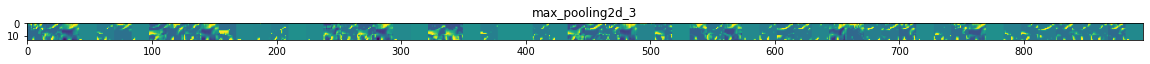

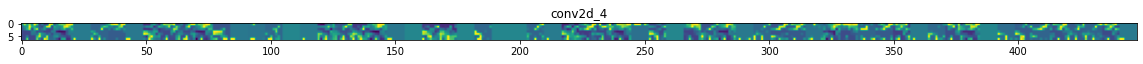

In [21]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
 
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
 
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
 
# Rescale by 1/255
x /= 255
 
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
 
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
 
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As you can see, you go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated." Most are set to zero. That's called sparsity. Representation sparsity is a key feature of deep learning.

Those representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a CNN (or a deep network in general) as an information distillation pipeline.